In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from tensorflow import keras

base_model = keras.applications.VGG16(
    weights='imagenet',
    input_shape=(224, 224, 3),
    include_top=False)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
# Freeze base model
base_model.trainable = False

In [ ]:
# Create inputs with correct shape
inputs =  keras.Input(shape = (224,224,3))

x = base_model(inputs, training=False)

# Add pooling layer or flatten layer
x = keras.layers.GlobalAveragePooling2D()(x)

# Add final dense layer
outputs = keras.layers.Dense(1, activation = 'softmax')(x)

# Combine inputs and outputs to create model
model = keras.Model(inputs, outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 14,715,201
Trainable params: 513
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model.compile(loss = keras.losses.CategoricalCrossentropy(from_logits = True) , 
              metrics = [keras.metrics.CategoricalAccuracy()])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#datagen = ImageDataGenerator(FIXME)
datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range=0.1,  # Randomly zoom image
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images horizontally
    vertical_flip=False, # Don't randomly flip images vertically
)  

In [ ]:
# Google Colab (需先正確掛載 Google drive)
# load and iterate training dataset
train_it = datagen.flow_from_directory("/content/drive/MyDrive/AI/train", 
                                       target_size=(224,224), 
                                       color_mode='rgb', 
                                       class_mode="categorical")
# load and iterate validation dataset
valid_it = datagen.flow_from_directory("/content/drive/MyDrive/AI/valid", 
                                      target_size=(224,224), 
                                      color_mode='rgb', 
                                      class_mode="categorical")

Found 326 images belonging to 2 classes.
Found 122 images belonging to 2 classes.


In [ ]:
history =  model.fit(train_it,
          validation_data=valid_it,
          steps_per_epoch=train_it.samples/train_it.batch_size,
          validation_steps=valid_it.samples/valid_it.batch_size,
          epochs=8) 
# oringinal 8
# 使用 Google colab GPU runtime 一回合約28秒 (第一回合需要載入資料都會比較久)

Epoch 1/8


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


10/10 [==============================] - 271s 27s/step - loss: 0.5474 - categorical_accuracy: 0.7914 - val_loss: 0.5104 - val_categorical_accuracy: 0.7541
Epoch 2/8
10/10 [==============================] - 242s 24s/step - loss: 0.1605 - categorical_accuracy: 0.9632 - val_loss: 0.4778 - val_categorical_accuracy: 0.7787
Epoch 3/8
10/10 [==============================] - 249s 25s/step - loss: 0.1299 - categorical_accuracy: 0.9693 - val_loss: 0.4127 - val_categorical_accuracy: 0.8115
Epoch 4/8
10/10 [==============================] - 244s 25s/step - loss: 0.1211 - categorical_accuracy: 0.9601 - val_loss: 0.4622 - val_categorical_accuracy: 0.7787
Epoch 5/8
10/10 [==============================] - 245s 26s/step - loss: 0.0979 - categorical_accuracy: 0.9693 - val_loss: 0.6173 - val_categorical_accuracy: 0.6639
Epoch 6/8
10/10 [==============================] - 243s 24s/step - loss: 0.0676 - categorical_accuracy: 0.9785 - val_loss: 0.5090 - val_categorical_accuracy: 0.7787
Epoch 7/8
10/10 [===

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

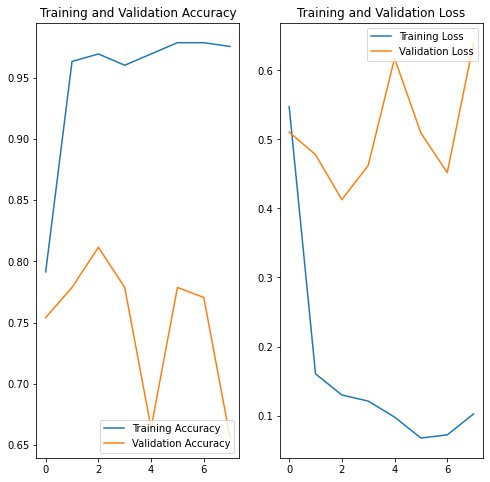

In [ ]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(8)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#設定影像路徑與高度寬度
import tensorflow as tf
import numpy as np

label = [
         "correct",
         "wrong",
]

In [ ]:
# 設定影像檔名與路徑
image_path = '/content/drive/MyDrive/no/1.jpg'


In [ ]:
img = tf.keras.utils.load_img(
    image_path, target_size=(224, 224)
)

#將影像轉換為像素陣列
img_array = tf.keras.utils.img_to_array(img) 
img_array = tf.expand_dims(img_array, 0) # Create a batch

#進行推論
predictions = model.predict(img_array)

print(predictions)  # 顯示本次預測結果，資料型態為 list，數字代表該類別的信心強度，愈高愈好
print(np.argmax(predictions)) # 取得數值最高者的位置
print(label[np.argmax(predictions)]) # 根據位置取得類別名稱


[[0.30943456 0.69056547]]
1
wrong


In [ ]:
print(
    "這張圖片應該是 {}，信心為 {:.2f} %"
    .format(label[np.argmax(predictions)], 100 * predictions[0][np.argmax(predictions)])
)

In [ ]:
import cv2
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
from IPython.display import display, Javascript
from IPython.display import Image
import matplotlib.pyplot as plt

In [ ]:
# for url in urls:
cap = cv2.VideoCapture(1)
image = io.imread("/content/drive/MyDrive/新科技應用實作營範例/單元4-Keras影像分類模型的訓練與驗證/影像分類/rose_test.jpg")
while True:
  # success, img = cap.read()
  # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(image)
  # cv2_imshow(image)
  key = cv2.waitKey(1)

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f34e5ddd0e0> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f34e5e0ff80> (for post_execute):


KeyboardInterrupt: ignored